In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def get_clusters(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((9, 9), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=6)

    ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda x: cv2.boundingRect(x)[1])
    
    clusters = []
    
    for i, ctr in enumerate(sorted_ctrs):
        x, y, w, h = cv2.boundingRect(ctr)
        clusters.append((x, y, x+w, y+h))

    return clusters

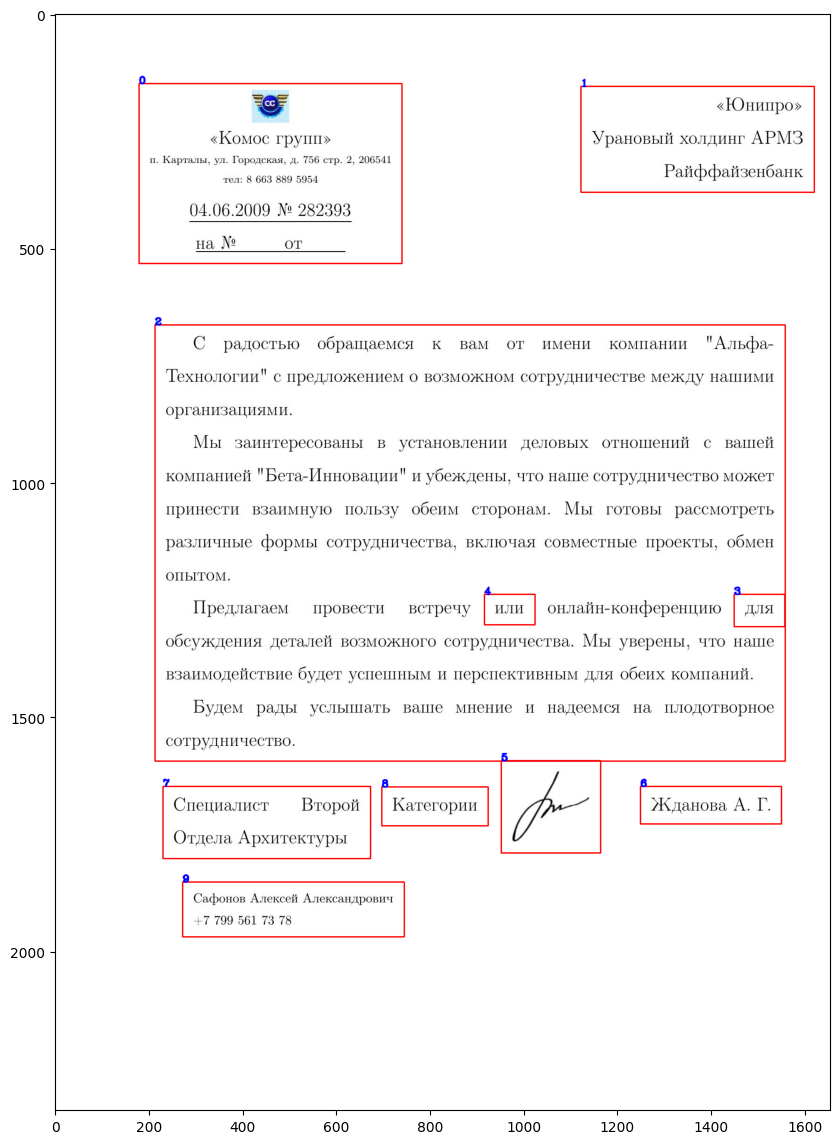

In [8]:
img = cv2.imread('latex_letters/jpg/0.jpg')
img_copy = img.copy()

sorted_cltrs = get_clusters(img)


for i, ctr in enumerate(sorted_cltrs):
    x1, y1, x2, y2 = ctr
    # clusters.append((x, y, x+w, y+h))
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(img_copy, str(i), (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(10, 20))
plt.imshow(img_copy)

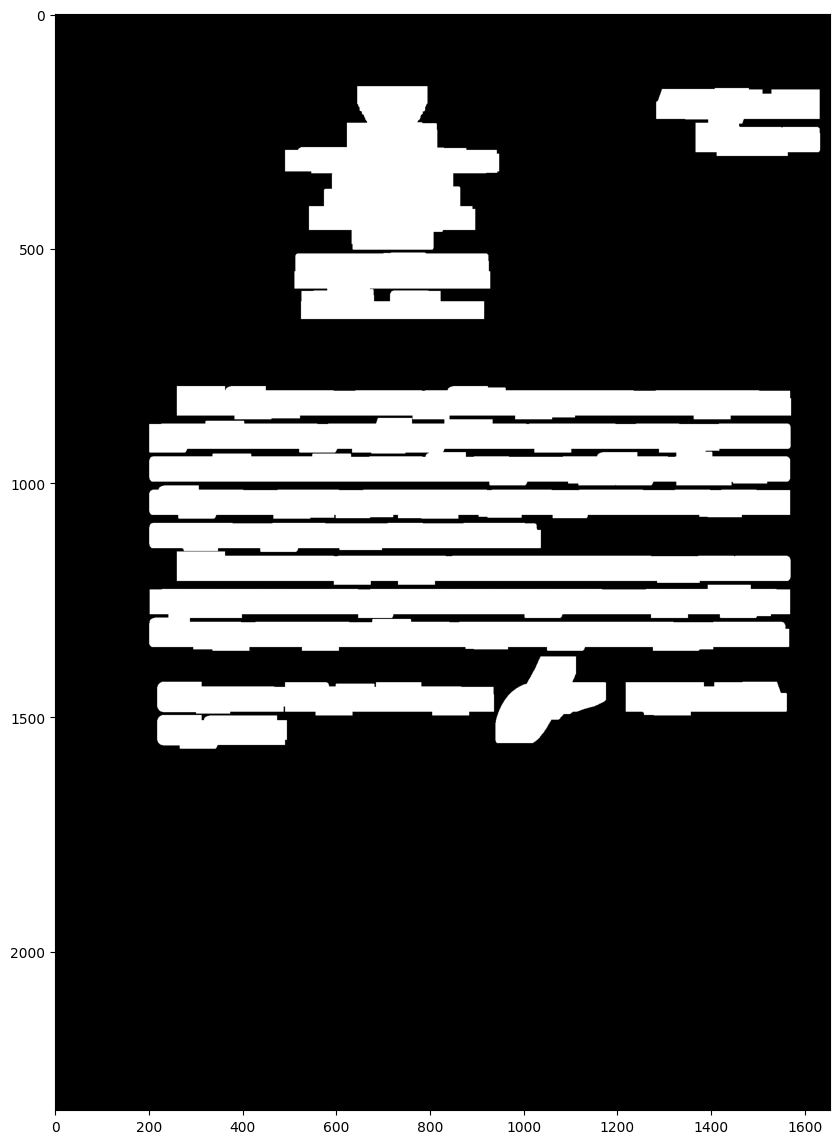

In [44]:
img = cv2.imread('latex_letters/jpg/1.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((7, 13), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=6)
img_erosion = cv2.erode(img_dilation, kernel, iterations=6)
img_part1 = img_dilation.copy()
plt.figure(figsize=(10, 20))
plt.imshow(img_part1, cmap='gray')

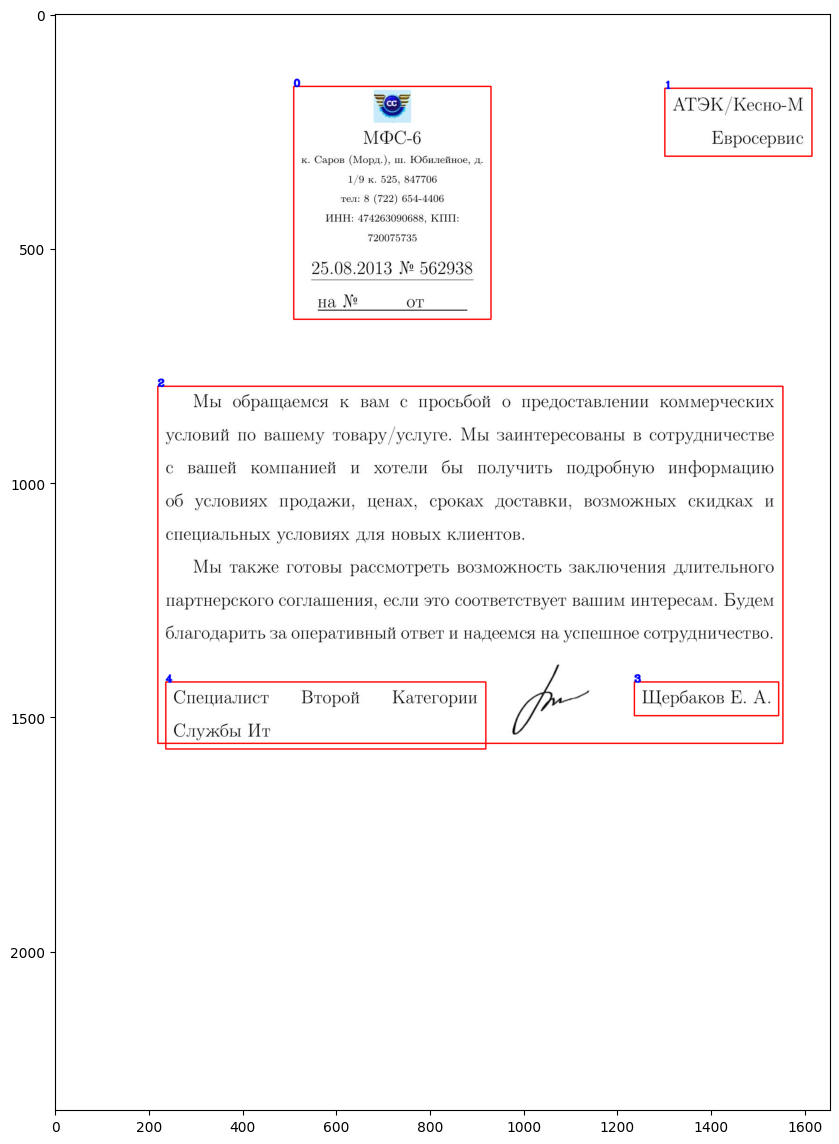

In [34]:
ctrs, hier = cv2.findContours(img_part1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda x: cv2.boundingRect(x)[1])

clusters = []
img_copy = img.copy()

for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    clusters.append((x, y, x+w, y+h))
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img_copy, str(i), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(10, 20))
plt.imshow(img_copy)